## Predicting Room Occupancy Rates using Machine Learning

Experimental data used for binary classification (room occupancy) from Temperature,Humidity,Light and CO2.


**Data Dictionary**
1. Temperature
2. Humidity
3. Light
4. Carbon dioxide(CO2)
5. Target Variable:
    * 1 - if there is chances of room occupancy.
    * 0 - No chances of room occupancy

In [1]:
# Import all the tools needed

# regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# make the plots to appear inside the notebook
%matplotlib inline 


# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# importing the data
df = pd.read_csv("room_occupancy.csv")
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
2660,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2661,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2662,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2663,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [3]:
# length of the dataset
len(df)

2665

In [4]:
# total numbers of rows and columns of the dataframe
df.shape

(2665, 6)

## Data Analysis

In [5]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [6]:
df.tail()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2660,24.290000,25.700000,808.0,1150.25,0.004829,1
2661,24.330000,25.736000,809.8,1129.20,0.004848,1
2662,24.330000,25.700000,817.0,1125.80,0.004841,1
2663,24.356667,25.700000,813.0,1123.00,0.004849,1
2664,24.408333,25.681667,798.0,1124.00,0.004860,1


In [7]:
# variation of classes on the target("Occupany") column
df["Occupancy"].value_counts()

0    1693
1     972
Name: Occupancy, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

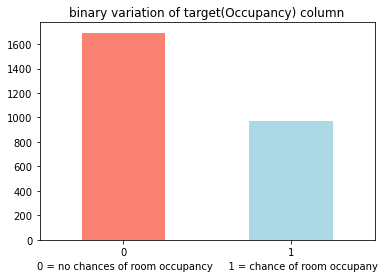

In [8]:
df["Occupancy"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

plt.title("binary variation of target(Occupancy) column")
plt.xlabel("0 = no chances of room occupancy     1 = chance of room occupany")
plt.xticks(rotation=0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 125.0 KB


In [10]:
# checking if there is any missing values inside the dataframe
df.isna().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [11]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


## Analyzing Patterns

In [12]:
df.head(10)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1
5,23.7600,26.260,568.666667,790.000000,0.004779,1
6,23.7300,26.290,536.333333,798.000000,0.004776,1
7,23.7540,26.290,509.000000,797.000000,0.004783,1
8,23.7540,26.350,476.000000,803.200000,0.004794,1
9,23.7360,26.390,510.000000,809.000000,0.004796,1


### Temperature vs Humidity for Occupancy

In [13]:
df["Temperature"].value_counts()

20.700000    241
20.890000    184
20.600000    138
20.500000    114
20.390000    108
            ... 
21.870000      1
21.912000      1
21.908333      1
21.934000      1
24.408333      1
Name: Temperature, Length: 335, dtype: int64

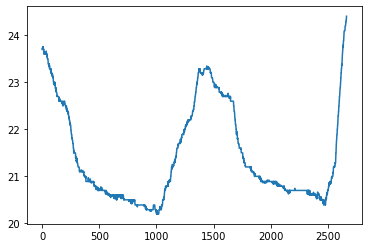

In [14]:
# Plotting Temperature values
df.Temperature.plot();

In [15]:
# Mean value of Temperature
df["Temperature"].mean()

21.433876288765127

<AxesSubplot:>

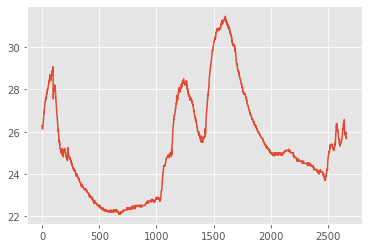

In [16]:
# Plotting Humidity values
plt.style.use('ggplot')
df.Humidity.plot()

In [17]:
# Mean value of Humidity
df["Humidity"].mean()

25.353936799774825

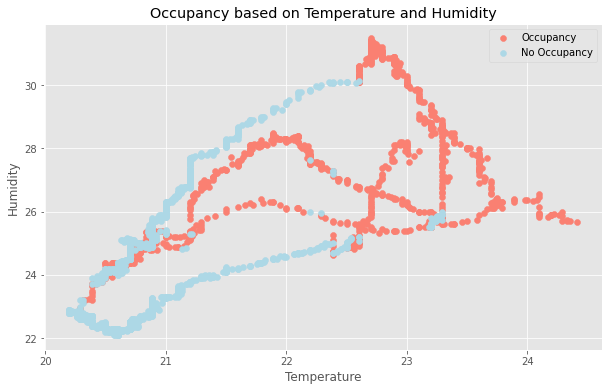

In [18]:
plt.figure(figsize=(10, 6))

# scatter with positive values
plt.scatter(df.Temperature[df.Occupancy==1],
           df.Humidity[df.Occupancy==1],
           c="salmon")

# scattering with negative values
plt.scatter(df.Temperature[df.Occupancy==0],
           df.Humidity[df.Occupancy==0],
           c="lightblue")

# Adding tag information
plt.title("Occupancy based on Temperature and Humidity")
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.legend(["Occupancy", "No Occupancy"])

<AxesSubplot:>

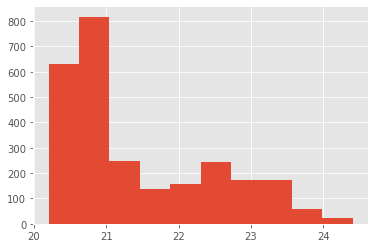

In [19]:
# Check the distribution type of the temperature with a histogram
df.Temperature.hist()

<AxesSubplot:>

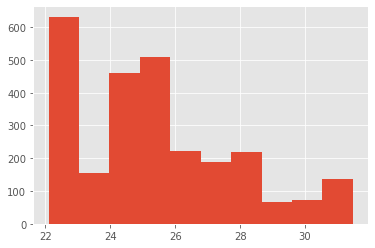

In [20]:
# Check the distribution type of the humidity with a histogram
df.Humidity.hist()

## Room occupancy based on the CO2 levels

In [21]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [22]:
df.CO2.value_counts()

436.000000     11
435.000000     10
438.000000      9
451.000000      9
436.500000      9
               ..
1076.166667     1
1083.666667     1
1088.750000     1
1080.500000     1
1124.000000     1
Name: CO2, Length: 1894, dtype: int64

In [23]:
pd.crosstab(df.CO2, df.Occupancy)

Occupancy,0,1
CO2,,
427.500000,1,0
427.600000,1,0
428.250000,1,0
429.200000,1,0
429.333333,1,0
...,...,...
1398.250000,0,1
1400.500000,0,1
1401.000000,0,1


## Correlation Matrix

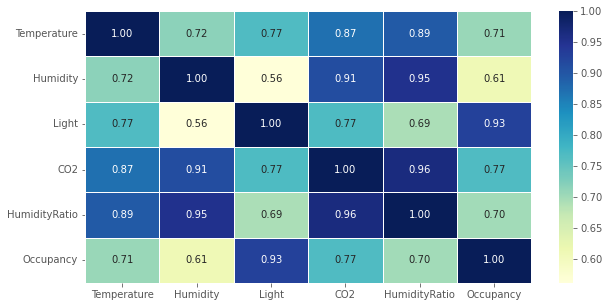

In [24]:
# Making a correlation matrix to represnt the data in a visual manner
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

In [25]:
# Setting up a random seed
np.random.seed(42)

# Creating the data and splitting them into X and y
X = df.drop("Occupancy", axis=1)
y = df["Occupancy"]

In [26]:
# Viewing the data of features dataset
X

,Temperature,Humidity,Light,CO2,HumidityRatio
0,23.700000,26.272000,585.200000,749.200000,0.004764
1,23.718000,26.290000,578.400000,760.400000,0.004773
2,23.730000,26.230000,572.666667,769.666667,0.004765
3,23.722500,26.125000,493.750000,774.750000,0.004744
4,23.754000,26.200000,488.600000,779.000000,0.004767
...,...,...,...,...,...
2660,24.290000,25.700000,808.000000,1150.250000,0.004829
2661,24.330000,25.736000,809.800000,1129.200000,0.004848
2662,24.330000,25.700000,817.000000,1125.800000,0.004841
2663,24.356667,25.700000,813.000000,1123.000000,0.004849


In [27]:
# Viewing the data of target dataset
y

0       1
1       1
2       1
3       1
4       1
       ..
2660    1
2661    1
2662    1
2663    1
2664    1
Name: Occupancy, Length: 2665, dtype: int64

In [28]:
# Splitting the data into train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model from sklearn
model = RandomForestClassifier()

In [29]:
# Fitting the data into the model and training it
model.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
# Testing accuracy of the trained model
model.score(X_test, y_test)

0.9887429643527205

## Saving and loading the trained ML model

In [31]:
import pickle

# saving the model
pickle.dump(model, open("room_occupancy_model_01.pkl", 'wb'))

In [41]:
# load the saved model
loaded_model = pickle.load(open("room_occupancy_model_01.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.9887429643527205